<center> <h1 style="background-color:skyblue; color:black"><br>Exploratory Data Analysis<br></h1></center>

# `Problem Statement:`
- Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales. Airbnb offers people an easy, relatively stress-free way to earn some income from their property.
- Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalized way of experiencing the world.
- This dataset describes the listing activity and metrics in San Diego, California for 2019. This data file includes all the needed information to find out more about hosts, geographical availability, and necessary metrics to make predictions and draw conclusions.

# `Importing Required Libraries:`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
from collections import Counter

# `Importing The Dataset:`

In [2]:
df = pd.read_csv('Airbnb data.csv')
df

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,17789893,1476,47501089,Private room,NaN,Amsterdam,NaN,Bijlmer Centrum,10,5.0,3,1.0,NaN,32.0,NaN,"1-3 pers. Cozy Rm AFAS Live, ArenA, ZIGGODOME",2017-07-22 16:05:14.158963,52.319794,4.955638,0101000020E6100000684293C492D2134080BA8102EF28...
18719,16877166,1476,67093870,Private room,NaN,Amsterdam,NaN,Bijlmer Centrum,6,5.0,4,1.0,NaN,24.0,NaN,"Modern Room by Arena, ZIGGO, HmH",2017-07-22 16:05:14.151986,52.319080,4.954822,0101000020E61000005801BEDBBCD1134062670A9DD728...
18720,19859427,1476,29724632,Private room,NaN,Amsterdam,NaN,Geuzenveld / Slotermeer,0,0.0,1,1.0,NaN,38.0,NaN,Private single room,2017-07-22 16:05:14.149610,52.384028,4.838403,0101000020E61000002079E750865A1340C85F5AD42731...
18721,17132164,1476,115156569,Private room,NaN,Amsterdam,NaN,Centrum West,13,4.5,2,1.0,NaN,36.0,NaN,City Center studio in Touristic Amsterdam 1,2017-07-22 16:05:14.146183,52.372120,4.890982,0101000020E6100000774CDD955D9013400118CFA0A12F...


In [3]:
print('Shape of the given Airbnb Dataset :', df.shape)

Shape of the given Airbnb Dataset : (18723, 20)


# `Dealing With Null Values:`

In [4]:
df.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

In [5]:
df['survey_id'].value_counts()

1476    18723
Name: survey_id, dtype: int64

In [6]:
df['city'].value_counts()

Amsterdam    18723
Name: city, dtype: int64

In [7]:
df.drop(['survey_id','country','borough','bathrooms','minstay','location','city'],axis=1,inplace=True)

- 'country','borough','bathrooms','minstay','location' features of the Airbnb dataset contain almost all null values, also 'survey_id' for the entire dataset id 1476 and the given data is of Amsterdam 'city' only. Thats why i dropped  above mention features beacuse they will not play any role in further analysis.

In [8]:
df.head(3)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude
0,10176931,49180562,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491
1,8935871,46718394,Shared room,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120
2,14011697,10346595,Shared room,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592


In [9]:
df.isnull().sum()

room_id                  0
host_id                  0
room_type                0
neighborhood             0
reviews                  0
overall_satisfaction     0
accommodates             0
bedrooms                 0
price                    0
name                    52
last_modified            0
latitude                 0
longitude                0
dtype: int64

In [10]:
#Shape of the dataset after dealing with null values:
df.shape

(18723, 13)

In [11]:
#Basic info of the Airbnb Dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   host_id               18723 non-null  int64  
 2   room_type             18723 non-null  object 
 3   neighborhood          18723 non-null  object 
 4   reviews               18723 non-null  int64  
 5   overall_satisfaction  18723 non-null  float64
 6   accommodates          18723 non-null  int64  
 7   bedrooms              18723 non-null  float64
 8   price                 18723 non-null  float64
 9   name                  18671 non-null  object 
 10  last_modified         18723 non-null  object 
 11  latitude              18723 non-null  float64
 12  longitude             18723 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.9+ MB


# `Dealing With Outliers:`

<Figure size 864x576 with 0 Axes>

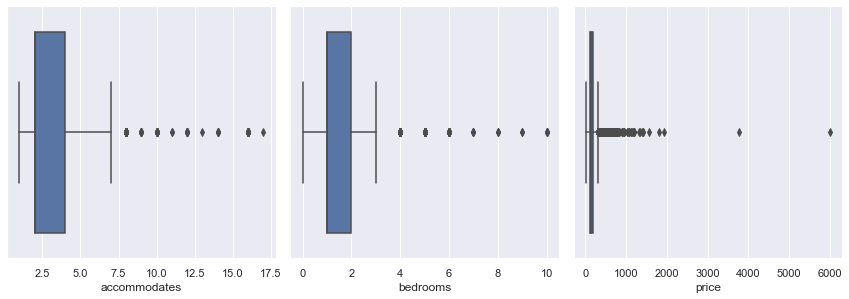

In [12]:
list1=['accommodates','bedrooms','price']
plt.figure(figsize=(12,8))
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(12,8))
for i in list1:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.boxplot(df[i])
    c = c + 1

plt.tight_layout()
plt.show()

In [13]:
for i in list1:
    q1=np.percentile(df[str(i)],25)
    q3=np.percentile(df[str(i)],75)
    IQR=q3-q1
    low= q1-1.5*IQR
    upp=q3+1.5*IQR
    df=df[(df[str(i)]<upp)&(df[str(i)]>low)]

In [14]:
df.shape

(16771, 13)

In [15]:
df.to_csv('Desktop\Clean_data_1.csv')

<Figure size 864x576 with 0 Axes>

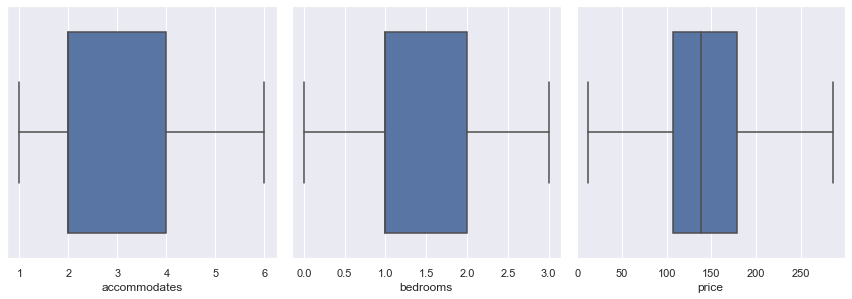

In [16]:
plt.figure(figsize=(12,8))
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(12,8))
for i in list1:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.boxplot(df[i])
    c = c + 1

plt.tight_layout()
plt.show()

- Their were ouliers present in the inegrer features of the dataset such as 'accommodates','bedrooms','price' which could potentially affect the further analysis, thats why we removed them before diving deep into the analysis.

# `Dealing With Duplicate Value:`

In [17]:
df[df.duplicated()].sum()

room_id                 0.0
host_id                 0.0
room_type               0.0
neighborhood            0.0
reviews                 0.0
overall_satisfaction    0.0
accommodates            0.0
bedrooms                0.0
price                   0.0
name                    0.0
last_modified           0.0
latitude                0.0
longitude               0.0
dtype: float64

- There are no duplicate values in the provided Airbnb dataset, so we can move further in the analysis now.

In [18]:
df.to_csv('Desktop/Clean_data_1')

In [19]:
df.head(3)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude
0,10176931,49180562,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491
1,8935871,46718394,Shared room,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120
2,14011697,10346595,Shared room,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592


In [59]:
np.sum(df['price'])

2404795.0

In [60]:
df.shape

(16771, 13)

# `Regarding The Neighborhood:`

In [20]:
Neighborhood_count=pd.DataFrame(df['neighborhood'].value_counts())
Neighborhood_count.reset_index(inplace=True)
Neighborhood_count.rename(columns={'index':'Neighborhood','neighborhood':'Number_of_Bookings'}, inplace=True)
Neighborhood_count

,Neighborhood,Number_of_Bookings
0,De Baarsjes / Oud West,3045
1,De Pijp / Rivierenbuurt,2165
2,Centrum West,1813
3,Centrum Oost,1453
4,Westerpark,1336
5,Noord-West / Noord-Midden,1214
6,Oud Oost,1112
7,Bos en Lommer,960
8,Oostelijk Havengebied / Indische Buurt,863
9,Watergraafsmeer,459


In [21]:
Neighborhood=list(Neighborhood_count['Neighborhood'])

In [22]:
df1=pd.DataFrame(df.groupby('neighborhood')['price'].sum())
df1.reset_index(inplace=True)
df1.head(3)

,neighborhood,price
0,Bijlmer Centrum,8028.0
1,Bijlmer Oost,8325.0
2,Bos en Lommer,118413.0


In [23]:
price_list=[]
for i in Neighborhood:
    DF=df1[df1['neighborhood']==i]
    a= int(DF['price'])
    price_list.append(a)
    
    
Neighborhood_count['Earning']=price_list
Neighborhood_count.head(3)

,Neighborhood,Number_of_Bookings,Earning
0,De Baarsjes / Oud West,3045,434829
1,De Pijp / Rivierenbuurt,2165,325210
2,Centrum West,1813,298247


In [24]:
df2=pd.DataFrame(df.groupby('neighborhood')['price'].mean())
df2.reset_index(inplace=True)
df2.head(3)

,neighborhood,price
0,Bijlmer Centrum,85.404255
1,Bijlmer Oost,92.500000
2,Bos en Lommer,123.346875


In [25]:
mean_list=[]
for i in Neighborhood:
    DF=df2[df2['neighborhood']==i]
    a= int(DF['price'])
    mean_list.append(a)
    
Neighborhood_count['Average_price']=mean_list
Neighborhood_count

,Neighborhood,Number_of_Bookings,Earning,Average_price
0,De Baarsjes / Oud West,3045,434829,142
1,De Pijp / Rivierenbuurt,2165,325210,150
2,Centrum West,1813,298247,164
3,Centrum Oost,1453,238006,163
4,Westerpark,1336,191958,143
5,Noord-West / Noord-Midden,1214,179810,148
6,Oud Oost,1112,157807,141
7,Bos en Lommer,960,118413,123
8,Oostelijk Havengebied / Indische Buurt,863,113428,131
9,Watergraafsmeer,459,62324,135


In [26]:
np.sum(Neighborhood_count['Earning'])

2404795

In [27]:
Neighborhood_count.to_csv('Desktop/Neighbourhood.csv')

Visualisation-
https://public.tableau.com/app/profile/vaishnavi.yashvant.kale/viz/AibnbAnalysis/Sheet1

<Figure size 864x576 with 0 Axes>

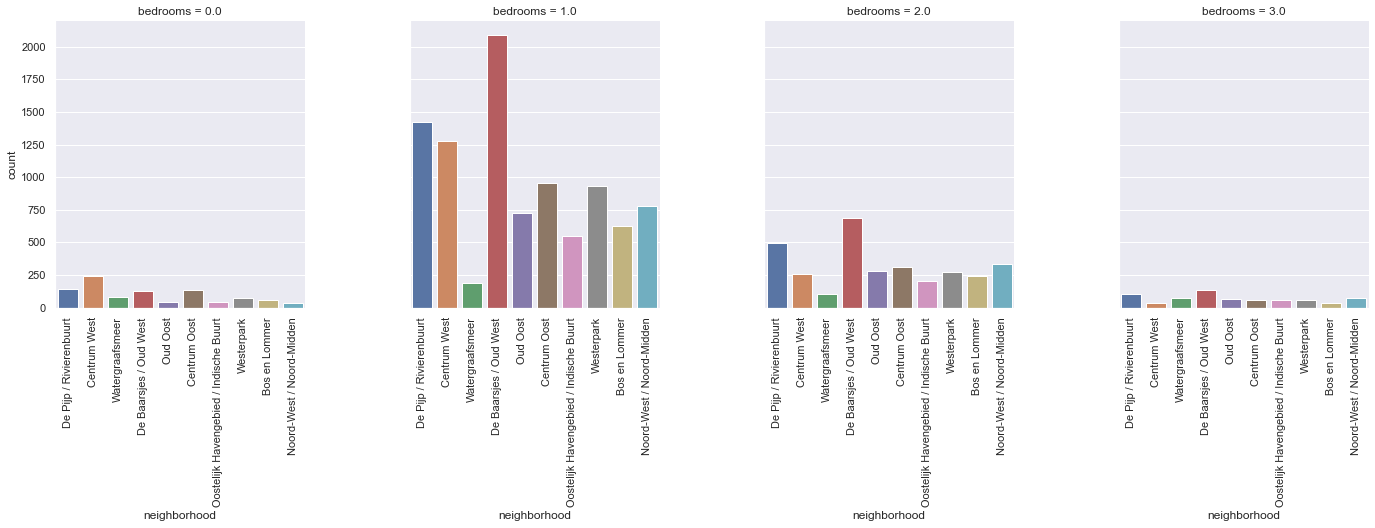

In [28]:
plt.figure(figsize=(12,8))
top_10_neighborhood=['De Baarsjes / Oud West','De Pijp / Rivierenbuurt','Centrum West','Centrum Oost','Westerpark','Noord-West / Noord-Midden' ,'Oud Oost'      ,'Bos en Lommer' ,'Oostelijk Havengebied / Indische Buurt','Watergraafsmeer']
top_10_neighborhood_df=df[df['neighborhood'].isin(top_10_neighborhood)]
catplot=sns.catplot(x='neighborhood',col='bedrooms', data=top_10_neighborhood_df, kind='count')
catplot.set_xticklabels(rotation=90)
plt.show()

In [29]:
top_10_neighborhood_df['bedrooms'].value_counts()

1.0    9547
2.0    3190
0.0     982
3.0     701
Name: bedrooms, dtype: int64

In [30]:
top_10_neighborhood_df['accommodates'].value_counts()

2    8744
4    3750
3    1327
1     284
5     205
6     110
Name: accommodates, dtype: int64

In [31]:
top_10_neighborhood=['De Baarsjes / Oud West','De Pijp / Rivierenbuurt','Centrum West','Centrum Oost','Westerpark','Noord-West / Noord-Midden' ,'Oud Oost'      ,'Bos en Lommer' ,'Oostelijk Havengebied / Indische Buurt','Watergraafsmeer']
top_10_neighborhood_df=df[df['neighborhood'].isin(top_10_neighborhood)]

In [32]:
num=[2,4,3]
accomodate_df=top_10_neighborhood_df[top_10_neighborhood_df['accommodates'].isin(num)]

<Figure size 864x576 with 0 Axes>

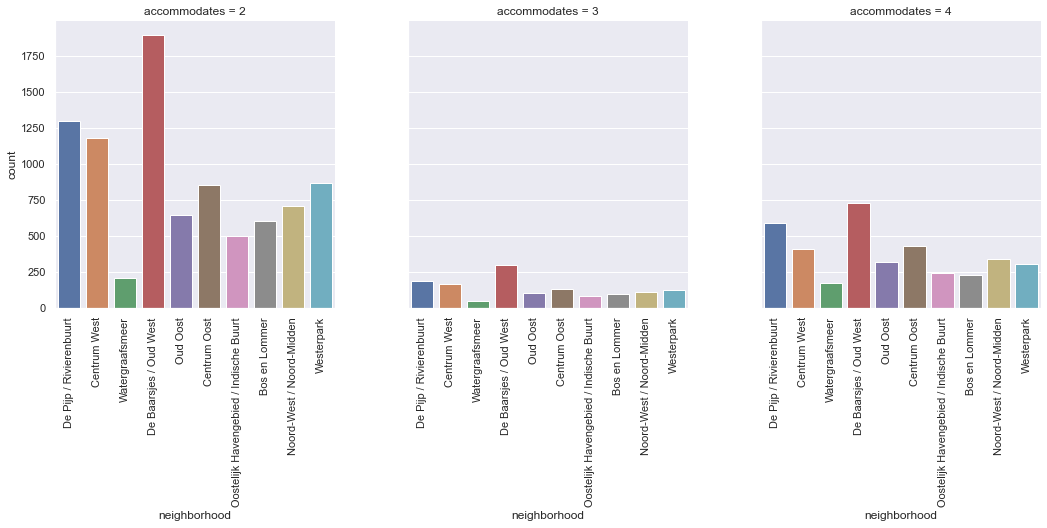

In [33]:
plt.figure(figsize=(12,8))
top_10_neighborhood=['De Baarsjes / Oud West','De Pijp / Rivierenbuurt','Centrum West','Centrum Oost','Westerpark','Noord-West / Noord-Midden' ,'Oud Oost'      ,'Bos en Lommer' ,'Oostelijk Havengebied / Indische Buurt','Watergraafsmeer']
top_10_neighborhood_df=df[df['neighborhood'].isin(top_10_neighborhood)]
catplot=sns.catplot(x='neighborhood',col='accommodates', data=accomodate_df, kind='count')
catplot.set_xticklabels(rotation=90)
plt.show()

# `Regarding The Host:`

In [34]:
len(df['host_id'].value_counts())

14425

In [35]:
df3=pd.DataFrame(df.groupby('host_id')['price'].sum())
df3.reset_index(inplace=True)
top_earners_df=df3.nlargest(10,'price')
top_earners_df.rename(columns={'host_id':'Host_id','price':'Earning'}, inplace=True)

In [36]:
top_10_earner=top_earners_df['Host_id']
top_earners_df

,Host_id,Earning
588,1464510,9765.0
13469,113977564,9756.0
10655,48703385,9420.0
13319,107745142,8249.0
11680,65859990,8197.0
206,517215,7811.0
12566,84453740,7412.0
10484,46691672,6105.0
3801,7594884,5082.0
12565,84449589,4945.0


In [37]:
df4=pd.DataFrame(df.groupby('host_id')['price'].mean())
df4.reset_index(inplace=True)
df4.head(3)

,host_id,price
0,2234,210.0
1,3159,82.0
2,3806,117.0


In [38]:
mean_list=[]
for i in top_10_earner:
    DF=df4[df4['host_id']==i]
    a= int(DF['price'])
    mean_list.append(a)
    
top_earners_df['Average_price']=mean_list
top_earners_df

,Host_id,Earning,Average_price
588,1464510,9765.0,150
13469,113977564,9756.0,113
10655,48703385,9420.0,200
13319,107745142,8249.0,133
11680,65859990,8197.0,154
206,517215,7811.0,162
12566,84453740,7412.0,121
10484,46691672,6105.0,160
3801,7594884,5082.0,154
12565,84449589,4945.0,141


In [39]:
top_earners_df.to_csv('Desktop/top_earners.csv')

In [40]:
np.mean(top_earners_df['Average_price'])

148.8

In [41]:
np.mean(top_earners_df['Earning'])

7674.2

In [56]:
list=top_earners_df['Host_id']

In [57]:
list

588        1464510
13469    113977564
10655     48703385
13319    107745142
11680     65859990
206         517215
12566     84453740
10484     46691672
3801       7594884
12565     84449589
Name: Host_id, dtype: int64

Visualisation-
https://public.tableau.com/app/profile/vaishnavi.yashvant.kale/viz/AibnbAnalysis/Sheet2

- Since the data is from july month only, finding out the relationship between monthly earnings and price was quite difficult.

# `Room Type:`

In [42]:
df['room_type'].value_counts()

Entire home/apt    13081
Private room        3631
Shared room           59
Name: room_type, dtype: int64

room_type Visualization-
https://public.tableau.com/app/profile/vaishnavi.yashvant.kale/viz/AibnbAnalysis/Sheet4

# `Regarding The Reviews:`

In [43]:
#Relationship between quality and price
df4

,host_id,price
0,2234,210.0
1,3159,82.0
2,3806,117.0
3,5988,120.0
4,7924,192.0
...,...,...
14420,141658022,72.0
14421,141665148,153.0
14422,141747815,107.0
14423,141749109,198.0


In [44]:
df3=pd.DataFrame(df.groupby('host_id')['overall_satisfaction'].mean())
df3.reset_index(inplace=True)
df3.head(3)

,host_id,overall_satisfaction
0,2234,0.0
1,3159,5.0
2,3806,5.0


In [45]:
host=list(df4['host_id'])
mean_list=[]
for i in host:
    DF=df3[df3['host_id']==i]
    a= int(DF['overall_satisfaction'])
    mean_list.append(a)
df4['Overall_satisfaction']=mean_list

In [46]:
df4.head(3)

,host_id,price,Overall_satisfaction
0,2234,210.0,0
1,3159,82.0,5
2,3806,117.0,5


Relationship between Quality and Price Visualization-
https://public.tableau.com/app/profile/vaishnavi.yashvant.kale/viz/AibnbAnalysis/Sheet3


In [47]:
df4.to_csv('Desktop/quality_vs_price.csv')

# `Regarding The Price:`

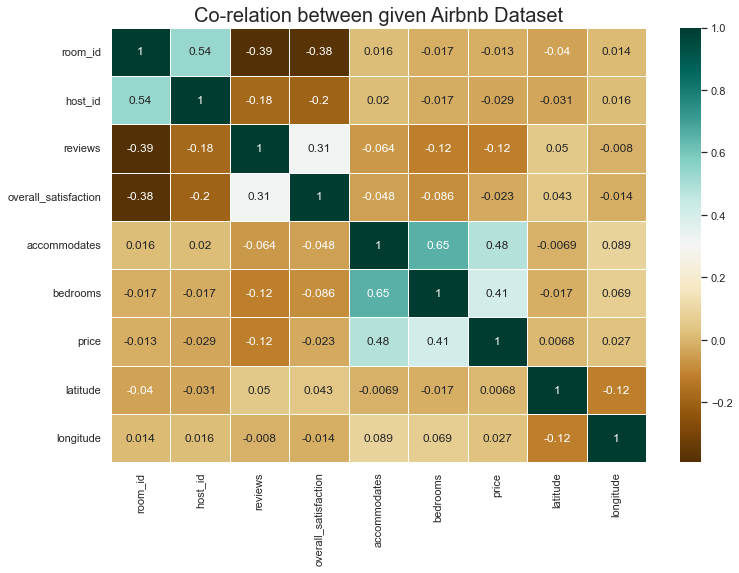

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linewidth=1,cmap = 'BrBG')
plt.title('Co-relation between given Airbnb Dataset',fontsize=20)
plt.show()

Price Vs Accomadates Visualizaion-
https://public.tableau.com/app/profile/vaishnavi.yashvant.kale/viz/AibnbAnalysis/Sheet5

Price Vs Bedrooms Visualization-
https://public.tableau.com/app/profile/vaishnavi.yashvant.kale/viz/AibnbAnalysis/Sheet6

## `Price Vs Location:`

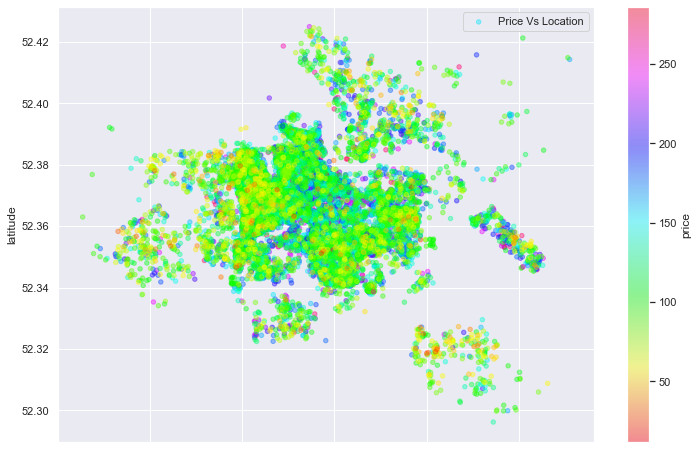

In [49]:
df.plot(kind='scatter', x='longitude', y='latitude', label='Price Vs Location', c='price',
                  cmap=plt.get_cmap('hsv'), colorbar=True, alpha=0.4, figsize=(12,8))
plt.legend()
plt.show()

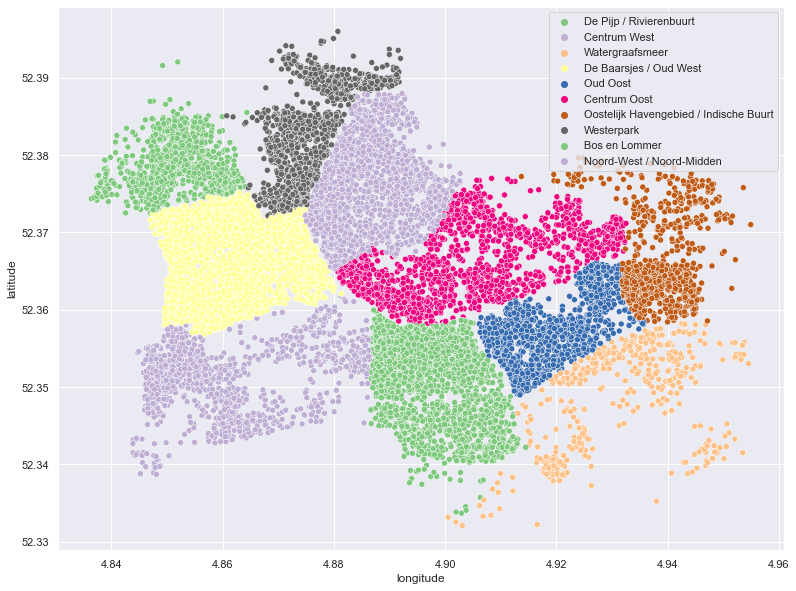

In [50]:
plt.figure(figsize=(13,10))
sns.scatterplot(top_10_neighborhood_df.longitude,top_10_neighborhood_df.latitude,hue=top_10_neighborhood_df.neighborhood,palette='Accent')
plt.legend()


# `Names:`

In [51]:
names=[]
for name in df.name:
    names.append(name)
    
def split_name(name):
    spl=str(name).split()
    return spl

names_count=[]
for x in names:
    for word in split_name(x):
        word=word.lower()
        names_count.append(word)
        
top_25_word=Counter(names_count).most_common()
top_25_word=top_25_word[0:25]

df_top_25_word=pd.DataFrame(top_25_word)
df_top_25_word.rename(columns={0:'Words',1:'Count'},inplace=True)

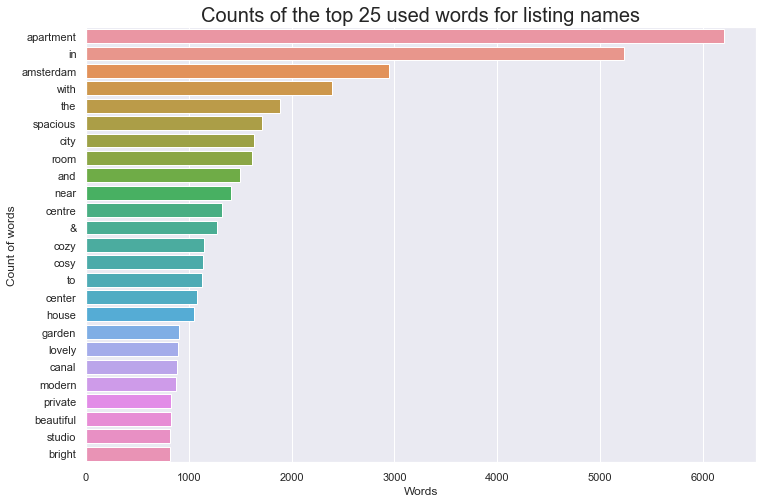

In [52]:
plt.figure(figsize=(12,8))
plot=sns.barplot(y='Words', x='Count', data=df_top_25_word)
plt.xlabel('Words')
plt.ylabel('Count of words')
plt.title('Counts of the top 25 used words for listing names',fontsize=20)
plt.show()